
# Time Series Forecasting for Windows Version Market Share

This project aims to analyze and forecast the market share of various Windows operating system versions using time series analysis. The dataset contains monthly market share data from September 2013 to September 2024. We will use Python libraries such as pandas, matplotlib, and SARIMAX from statsmodels to conduct the analysis.

Project Goals:

1. Load and preprocess the dataset.
2.   Handle missing data.
3.   Analyze the market share trends of different Windows versions.
4. Use time series decomposition to understand the components of the Windows 10 market share.
5. Build a Seasonal Auto-Regressive Integrated Moving Average (SARIMA) model to forecast future trends.
6. Visualize the results to interpret the findings effectively.

### Step 1: Import Necessary Libraries and Mount Drive

In [1]:
# Import necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the data
drive.mount('/content/drive')


Mounted at /content/drive


### Step 2: Load and Inspect the Data

In [2]:
# Specify the file path
file_path = '/content/drive/My Drive/Microsoft Projeleri 2024/Time Series Forecasting for Windows Version Market Share/windows_version-TR-monthly-201309-202409.csv'

# Load the data into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


,Date,Win7,WinXP,Win10,Win8.1,Win8,WinVista,Win11,Win2003,Other
0,2013-09,61.05,27.47,0.0,0.02,9.06,2.32,0.0,0.02,0.05
1,2013-10,60.71,27.00,0.0,0.17,9.80,2.25,0.0,0.02,0.05
2,2013-11,60.90,25.97,0.0,0.76,10.14,2.17,0.0,0.02,0.05
3,2013-12,60.59,25.93,0.0,1.26,10.16,1.99,0.0,0.03,0.05
4,2014-01,60.54,25.50,0.0,1.75,10.26,1.87,0.0,0.02,0.05


**Description:**
We load the CSV file containing the monthly market share data into a pandas DataFrame. The initial inspection allows us to understand the data structure and its contents.

### Step 3: Convert Date Column to Datetime Format

In [3]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

# Check the first few rows again
data.head()


,Date,Win7,WinXP,Win10,Win8.1,Win8,WinVista,Win11,Win2003,Other
0,2013-09-01,61.05,27.47,0.0,0.02,9.06,2.32,0.0,0.02,0.05
1,2013-10-01,60.71,27.00,0.0,0.17,9.80,2.25,0.0,0.02,0.05
2,2013-11-01,60.90,25.97,0.0,0.76,10.14,2.17,0.0,0.02,0.05
3,2013-12-01,60.59,25.93,0.0,1.26,10.16,1.99,0.0,0.03,0.05
4,2014-01-01,60.54,25.50,0.0,1.75,10.26,1.87,0.0,0.02,0.05


**Description:**
The 'Date' column is converted to a datetime format to facilitate time series analysis. This conversion helps in indexing and manipulating the time-based data correctly.

### Step 4: Handle Missing Data

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values: \n", missing_values)

# Fill missing values using forward fill method
data.fillna(method='ffill', inplace=True)

# Check for missing values again
print("Missing Values after forward fill: \n", data.isnull().sum())


Missing Values: 
 Date        0
Win7        0
WinXP       0
Win10       0
Win8.1      0
Win8        0
WinVista    0
Win11       0
Win2003     0
Other       0
dtype: int64
Missing Values after forward fill: 
 Date        0
Win7        0
WinXP       0
Win10       0
Win8.1      0
Win8        0
WinVista    0
Win11       0
Win2003     0
Other       0
dtype: int64


<ipython-input-4-ee4d34b199e6>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


**Description:**
We check for missing values in the dataset. If missing values are found, we use the forward fill method to handle them, ensuring a complete dataset for analysis.

### Step 5: Validate Data Consistency

In [5]:
# Calculate the total market share per month to ensure it sums up to 100%
data['Total'] = data[['Win7', 'WinXP', 'Win10', 'Win8.1', 'Win8', 'WinVista', 'Win11', 'Win2003', 'Other']].sum(axis=1)

# Check if the totals are around 100
print("Total Market Share Check: \n", data['Total'].describe())

# Identify any anomalies where the total is not close to 100%
anomalies = data[data['Total'] != 100]
print("Anomalies: \n", anomalies)


Total Market Share Check: 
 count    133.000000
mean      99.999850
std        0.008789
min       99.980000
25%       99.990000
50%      100.000000
75%      100.010000
max      100.020000
Name: Total, dtype: float64
Anomalies: 
           Date   Win7  WinXP  Win10  Win8.1   Win8  WinVista  Win11  Win2003  \
0   2013-09-01  61.05  27.47   0.00    0.02   9.06      2.32   0.00     0.02   
2   2013-11-01  60.90  25.97   0.00    0.76  10.14      2.17   0.00     0.02   
3   2013-12-01  60.59  25.93   0.00    1.26  10.16      1.99   0.00     0.03   
4   2014-01-01  60.54  25.50   0.00    1.75  10.26      1.87   0.00     0.02   
6   2014-03-01  60.81  24.12   0.00    2.70  10.56      1.73   0.00     0.02   
..         ...    ...    ...    ...     ...    ...       ...    ...      ...   
127 2024-04-01   2.40   0.36  77.99    0.62   0.13      0.10  18.38     0.00   
128 2024-05-01   2.30   0.51  76.61    0.64   0.17      0.10  19.65     0.00   
130 2024-07-01   2.17   0.34  73.85    0.55   0.19 

**Description:**
To ensure data consistency, we calculate the total market share for all Windows versions each month. This total should be close to 100%. Any significant deviations indicate potential data errors or inconsistencies.

### Step 6: Visualize Market Share Trends

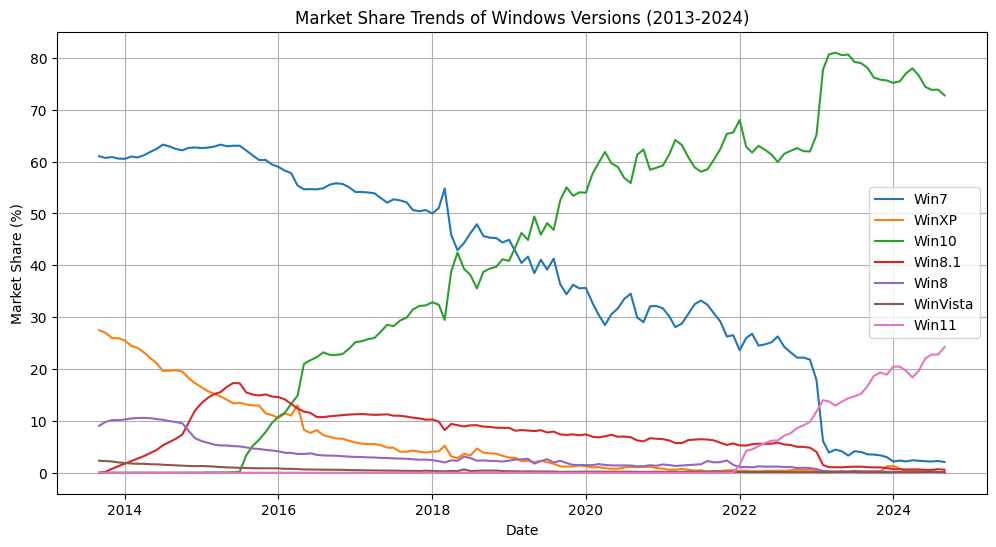

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings for visualization
plt.figure(figsize=(12, 6))

# Plot the market share trends for each Windows version
for column in ['Win7', 'WinXP', 'Win10', 'Win8.1', 'Win8', 'WinVista', 'Win11']:
    plt.plot(data['Date'], data[column], label=column)

plt.title('Market Share Trends of Windows Versions (2013-2024)')
plt.xlabel('Date')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


**Description:**
This visualization illustrates the market share trends of various Windows versions over time. Each version's trend helps in understanding its rise or decline in market share.

### Step 7: Decompose Time Series for Windows 10 Market Share

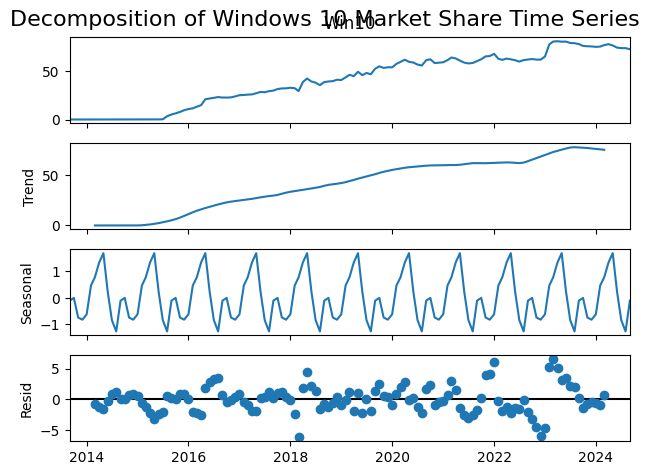

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a time series for Windows 10 market share and set the frequency
win10_series = data.set_index('Date')['Win10'].asfreq('MS')

# Decompose the time series to separate trend, seasonality, and noise
decomposition = seasonal_decompose(win10_series, model='additive', period=12)

# Plot the components
decomposition.plot()
plt.suptitle('Decomposition of Windows 10 Market Share Time Series', fontsize=16)
plt.show()


**Description:**
Decomposing the Windows 10 market share helps identify its trend, seasonal patterns, and irregular components. This understanding is crucial for building an effective forecasting model.

### Step 8: Build and Train SARIMA Model

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the SARIMA model considering seasonality
model = SARIMAX(win10_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = model.fit(disp=False)

# Display the summary of the model
print(sarima_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Win10   No. Observations:                  133
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -249.169
Date:                            Fri, 06 Sep 2024   AIC                            508.339
Time:                                    13:54:04   BIC                            521.656
Sample:                                09-01-2013   HQIC                           513.736
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6260      0.795     -0.788      0.431      -2.184       0.932
ma.L1          0.6881      0.742   

**Description:**
The SARIMA model is constructed to forecast the future market share of Windows 10 by considering both trend and seasonal components. The model summary provides insights into the model parameters and their significance.

### Step 9: Forecast Future Market Share

In [9]:
# Forecast the next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Display forecast values
print("Windows 10 Market Share Forecast for the Next 12 Months:")
print(forecast_values)


Windows 10 Market Share Forecast for the Next 12 Months:
2024-10-01    73.608914
2024-11-01    73.544783
2024-12-01    73.884898
2025-01-01    75.307279
2025-02-01    78.345371
2025-03-01    79.658629
2025-04-01    80.667702
2025-05-01    80.766589
2025-06-01    79.796753
2025-07-01    78.951440
2025-08-01    79.095837
2025-09-01    80.539732
Freq: MS, Name: predicted_mean, dtype: float64


**Description:**
We forecast the Windows 10 market share for the next 12 months. The confidence intervals provide a range within which the actual values are likely to fall, enhancing the reliability of the predictions.

### Step 10: Visualize Forecast Results

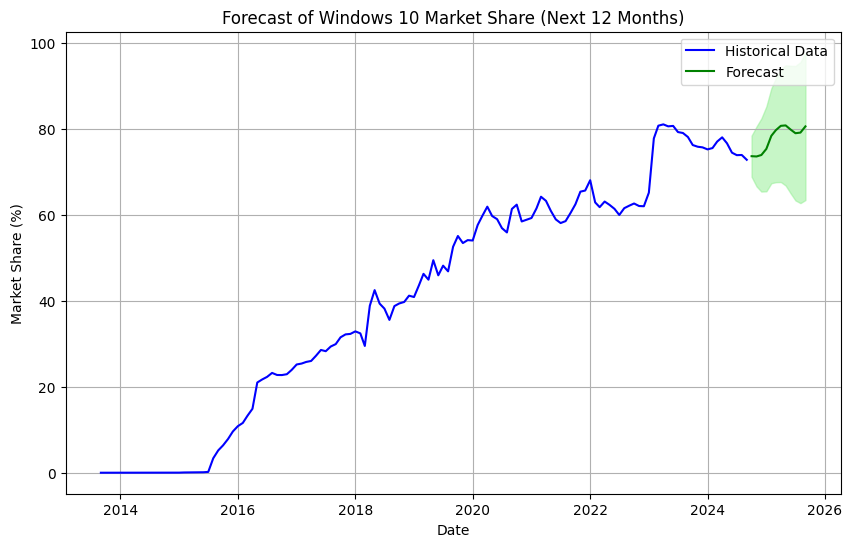

In [10]:
# Visualization of forecast results
plt.figure(figsize=(10, 6))
plt.plot(win10_series.index, win10_series, label='Historical Data', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='green')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='lightgreen', alpha=0.5)
plt.title('Forecast of Windows 10 Market Share (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


**Description:**
This visualization shows the historical market share of Windows 10 along with the forecasted values for the next 12 months, allowing for easy interpretation of future trends.

### Step 11: Focus on the Forecast Period

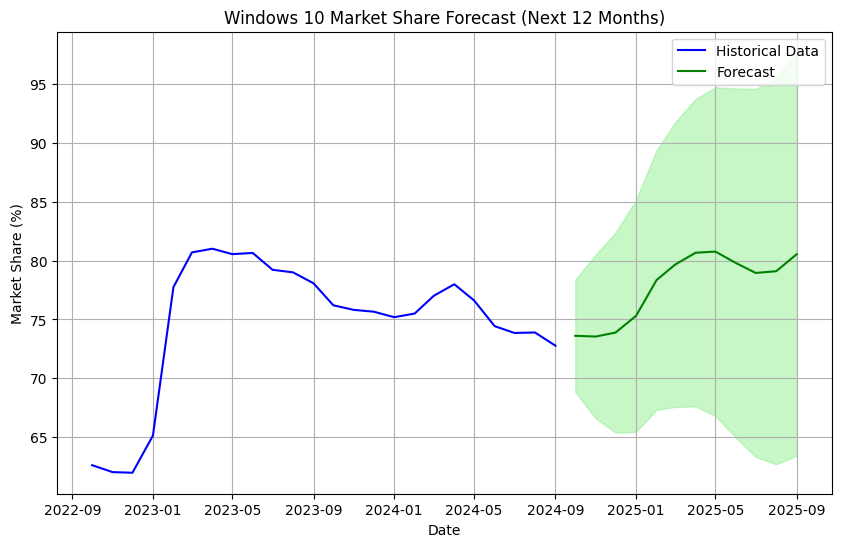

In [11]:
# Focus on the forecast period, including the last 12 months of historical data
plt.figure(figsize=(10, 6))
plt.plot(win10_series[-24:].index, win10_series[-24:], label='Historical Data', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='green')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='lightgreen', alpha=0.5)
plt.title('Windows 10 Market Share Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


**Description:**
This final plot zooms in on the forecast period and the last 12 months of historical data, making the future trends more visible and easier to understand for stakeholders.